<a href="https://colab.research.google.com/github/quantasaurus/strategy_backtest_long/blob/main/backtester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance -q

     |████████████████████████████████| 62 kB 630 kB/s 


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf


In [3]:
# Currently backtesting strategy on HDL
# Other algorand related assets include: YLDY-USD, OPUL-USD, ALGO-USD

asset = "HDL-USD"
df = yf.download(asset, start="2022-06-15", end="2022-12-15", interval='1h')[['Close']]
df

[*********************100%***********************]  1 of 1 completed


,Close
2022-06-15 00:00:00,0.132364
2022-06-15 01:00:00,0.134709
2022-06-15 02:00:00,0.132263
2022-06-15 03:00:00,0.129069
2022-06-15 04:00:00,0.127331
...,...
2022-12-14 19:00:00,0.018855
2022-12-14 20:00:00,0.018812
2022-12-14 21:00:00,0.018776
2022-12-14 22:00:00,0.018805


In [ ]:
# Here we can specify our moving average intervals.  50 and 200 are commonly used in trading
SMA_1 = 50
SMA_2 = 200

df[f'{SMA_1}_MA'] = df['Close'].rolling(SMA_1).mean()
df[f'{SMA_2}_MA'] = df['Close'].rolling(SMA_2).mean()

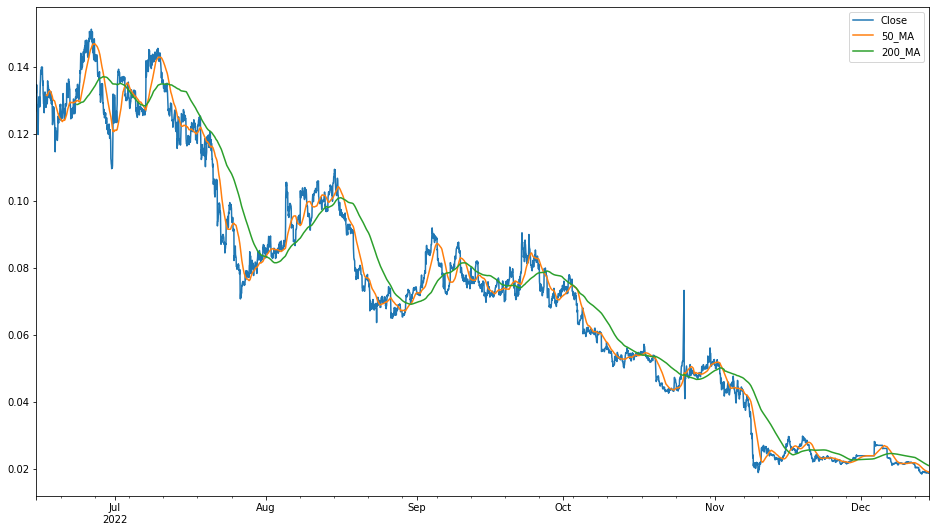

In [5]:
df.plot(figsize=(16,9))

In [ ]:
# Calculate log returns of close price to use in profitability calculation 
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))

In [ ]:
# Bot buys when SMA_1 < SMA_2, then sells when SMA_1 > SMA_2
df['position'] = np.where(df[f'{SMA_1}_MA'] < df[f'{SMA_2}_MA'], 1, 0)

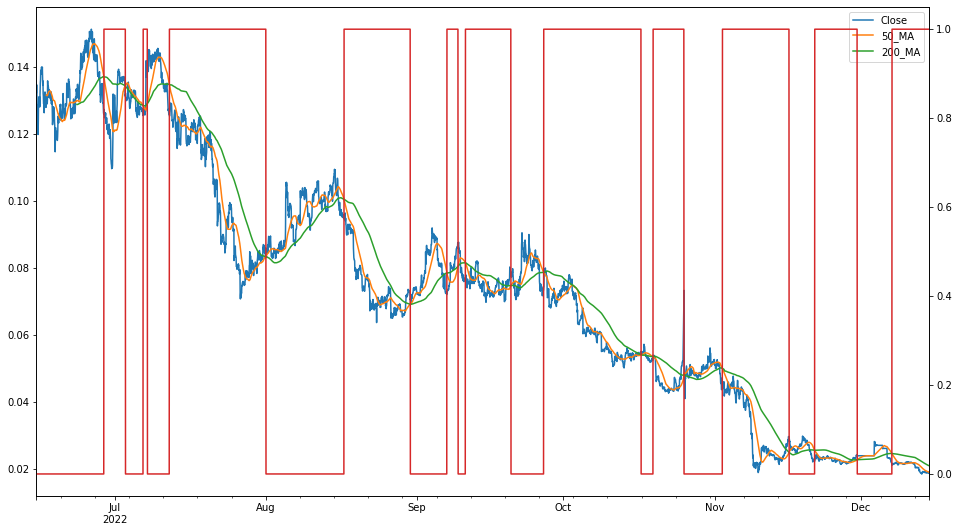

In [8]:
df[['Close', f'{SMA_1}_MA', f'{SMA_2}_MA']].plot(figsize=(16,9))
df['position'].plot(secondary_y=True)

In [9]:
df['strategy_returns'] = df['returns'] * df['position'].shift(1)
df

,Close,50_MA,200_MA,returns,position,strategy_returns
2022-06-15 00:00:00,0.132364,NaN,NaN,NaN,0,NaN
2022-06-15 01:00:00,0.134709,NaN,NaN,0.017561,0,0.000000
2022-06-15 02:00:00,0.132263,NaN,NaN,-0.018323,0,-0.000000
2022-06-15 03:00:00,0.129069,NaN,NaN,-0.024448,0,-0.000000
2022-06-15 04:00:00,0.127331,NaN,NaN,-0.013556,0,-0.000000
...,...,...,...,...,...,...
2022-12-14 19:00:00,0.018855,0.019166,0.021139,-0.017731,1,-0.017731
2022-12-14 20:00:00,0.018812,0.019133,0.021116,-0.002268,1,-0.002268
2022-12-14 21:00:00,0.018776,0.019098,0.021093,-0.001946,1,-0.001946
2022-12-14 22:00:00,0.018805,0.019083,0.021070,0.001537,1,0.001537


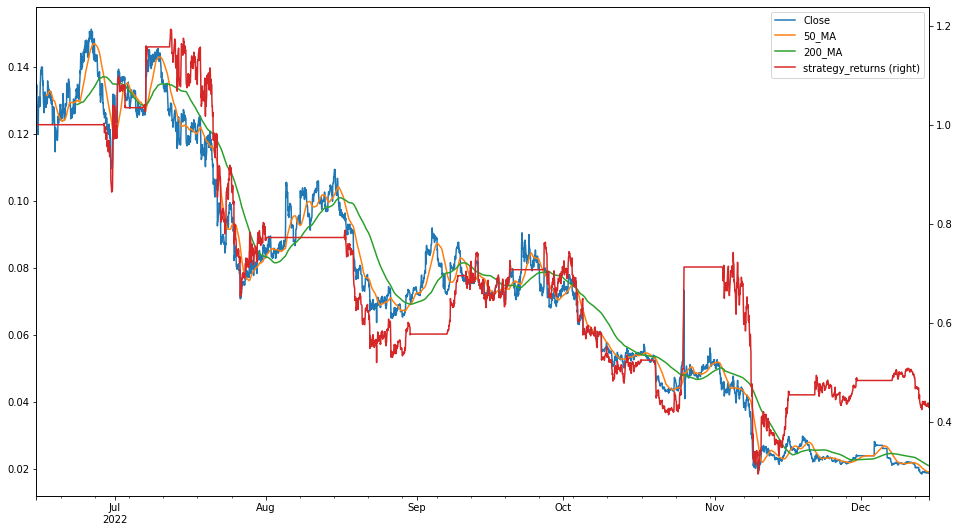

In [10]:
df[['Close', f'{SMA_1}_MA', f'{SMA_2}_MA']].plot(figsize=(16,9))
df['strategy_returns'].cumsum().apply(np.exp).plot(secondary_y=True, legend=True)

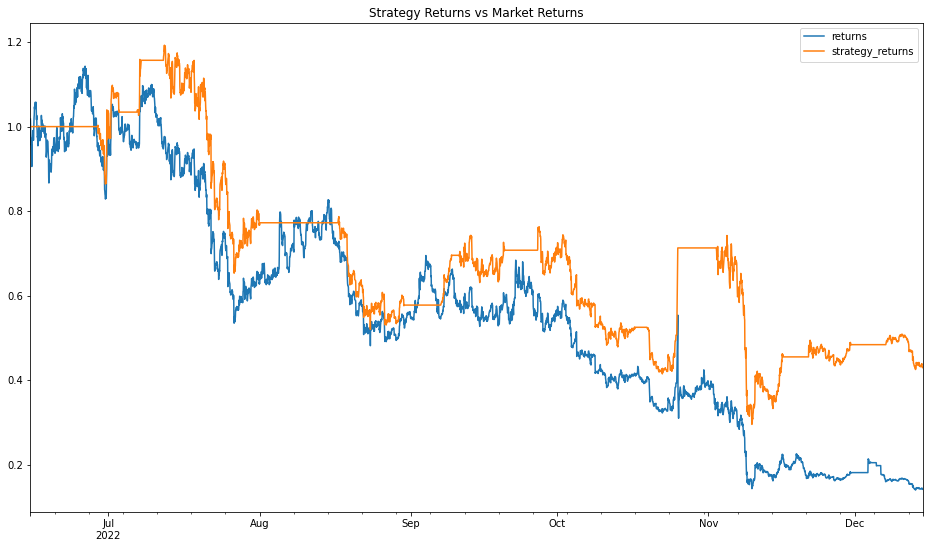

In [11]:
df[['returns', 'strategy_returns']].cumsum().apply(np.exp).plot(figsize=(16,9), title='Strategy Returns vs Market Returns')